In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dat_hea_reader import *
from eeg_avg import *
import scipy.signal as sig

Leemos los datos

In [2]:
path_realizacion = r'data_raw_N1\N1_evoked_raw_10_F1_R1'
fs, trials, comments = read_trials(path_realizacion)

                                   ABR           OAE
0 days 00:00:00           -8758.544955 -2.901990e+09
0 days 00:00:00.000020833 -8605.957063 -2.840397e+09
0 days 00:00:00.000041666 -8489.990266 -2.803994e+09
0 days 00:00:00.000062499 -8367.919953 -2.775552e+09
0 days 00:00:00.000083332 -8215.332062 -2.761702e+09
...                                ...           ...
0 days 00:00:43.209871131    67.138672 -5.230592e+08
0 days 00:00:43.209891964   -54.931641 -5.284608e+08
0 days 00:00:43.209912797  -164.794922 -6.082048e+08
0 days 00:00:43.209933630  -201.416016 -6.021888e+08
0 days 00:00:43.209954463  -128.173829 -5.820672e+08

[2074112 rows x 2 columns]


[-199.31618301 -196.6913913  -192.86269514 ...   64.15690875   59.99923868
   57.26945531]


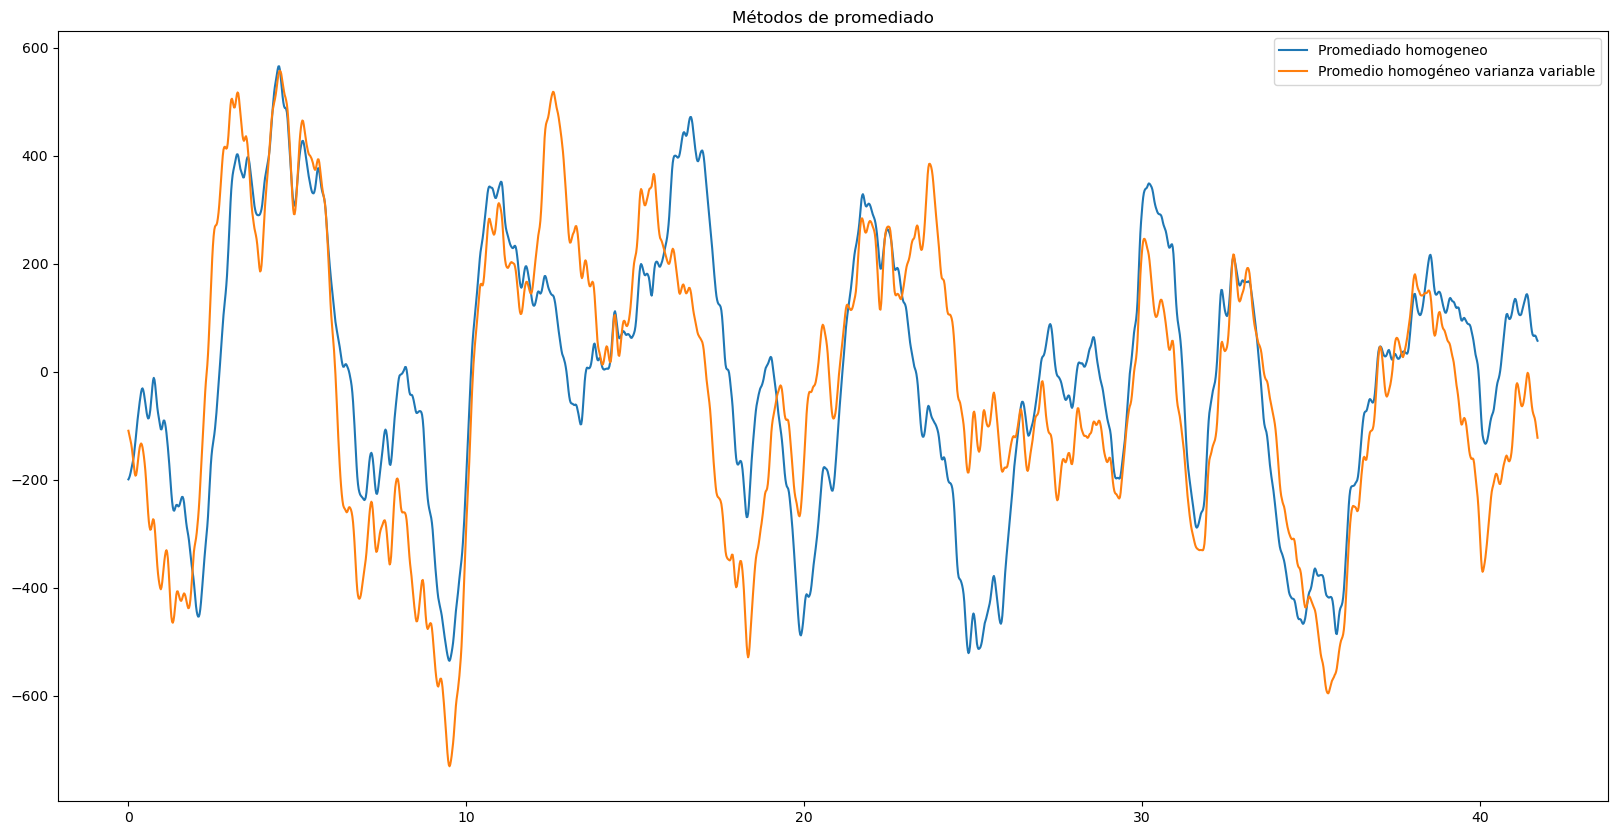

In [4]:
tr_len = comments['Trial Length (samples)']
t = np.linspace(0, tr_len/fs, tr_len)*1000 # convert to ms
trials_mean = average_EEG(trials, mode='homogenous') 
trials_amp = average_EEG(trials, mode='amp')
trials_var = average_EEG(trials, mode='var')
trials_both = average_EEG(trials, mode='both')

print(trials_mean)


plt.figure(figsize = (20,10))
plt.plot(t, trials_mean, label='Promediado homogeneo')
#plt.plot(t, trials_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t, trials_var, label='Promedio homogéneo varianza variable')
#plt.plot(t, trials_both, label='Promedio inhomogéneo todo variable')
plt.title('Métodos de promediado')
plt.legend()
plt.show()

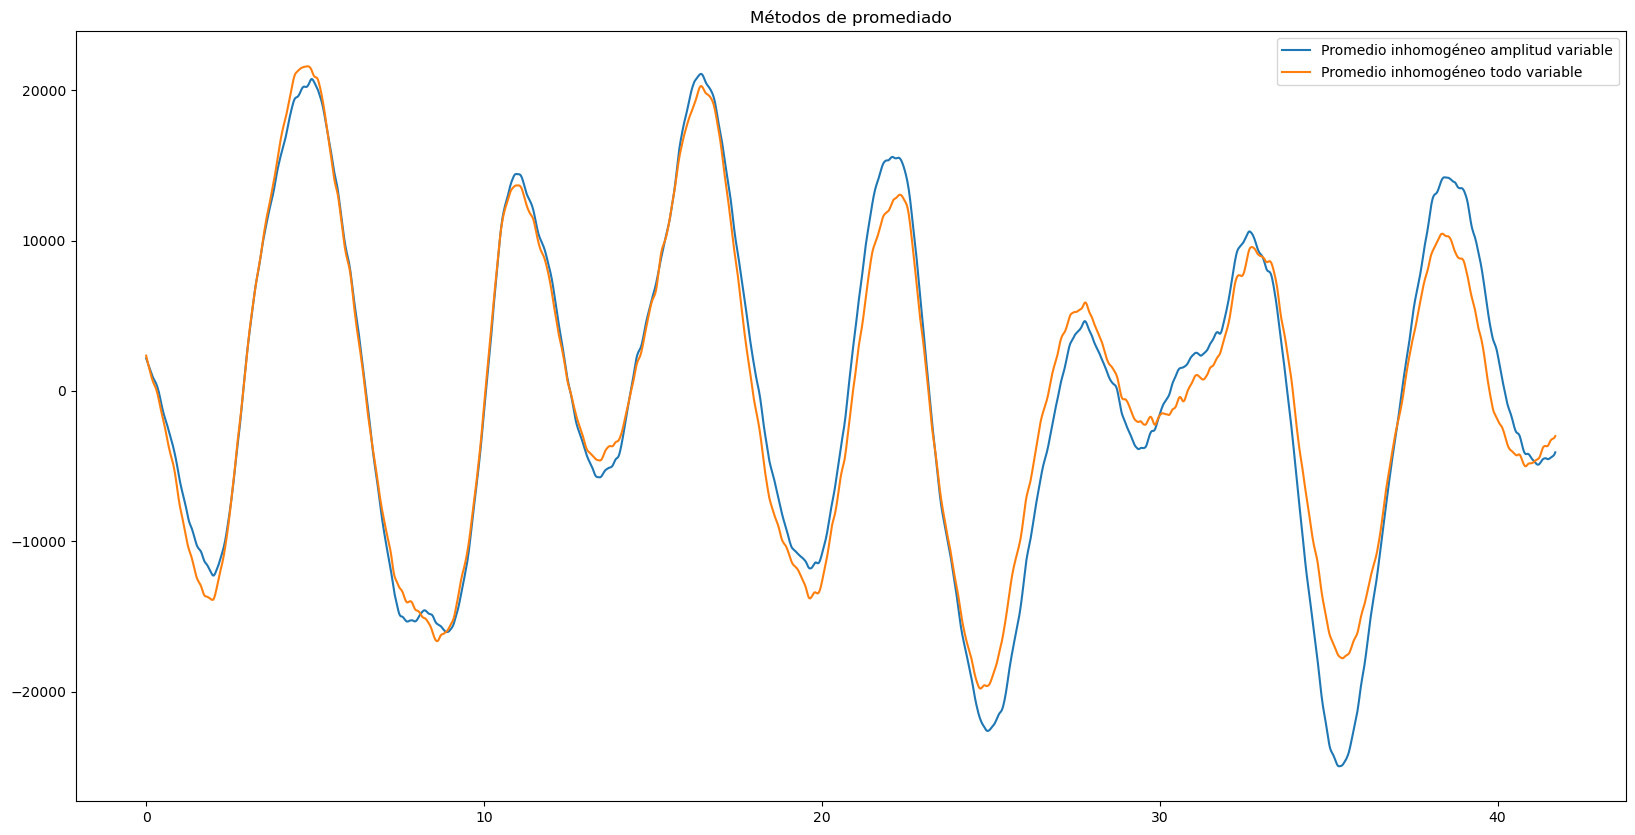

In [5]:
plt.figure(figsize = (20,10))
plt.plot(t, trials_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t, trials_both, label='Promedio inhomogéneo todo variable')
plt.title('Métodos de promediado')
plt.legend()
plt.show()

Guardamos los promedios en un archivo .csv

In [9]:
df = pd.DataFrame({'t':t, 'mean':trials_mean, 'amp':trials_amp, 'var':trials_var, 'both':trials_both})
df.to_csv("N1_evoked_raw_10_F1_R1.csv")
df.head(10)

,t,mean,amp,var,both
0,0.000000,-199.316183,2166.563834,-109.327614,2345.712106
1,0.020844,-196.691391,2025.990378,-115.232744,2137.879035
2,0.041687,-192.862695,1891.992648,-121.199425,1934.691352
3,0.062531,-187.564116,1760.608936,-127.617989,1737.516061
4,0.083375,-181.383606,1634.293314,-134.133438,1555.194292
5,0.104219,-175.077107,1508.893128,-143.033639,1376.355614
6,0.125062,-168.812604,1375.183191,-154.361862,1194.924089
7,0.145906,-161.974146,1234.824144,-166.900214,1012.794163
8,0.166750,-152.433903,1097.437648,-178.623857,844.939259
9,0.187594,-141.192795,971.100721,-188.215072,697.536000


(array([1.29923894e+05, 2.84532529e+05, 3.58590038e+05, ...,
        5.20838519e-05, 4.14425897e-05, 1.77863854e-05]),
 array([0.0000000e+00, 2.3976024e+01, 4.7952048e+01, ..., 2.3952048e+04,
        2.3976024e+04, 2.4000000e+04]))

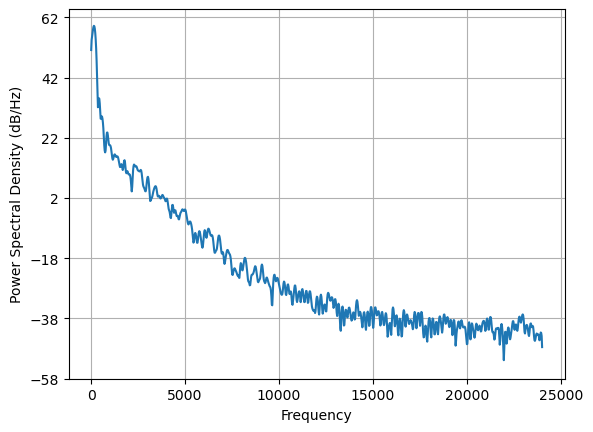

In [7]:
n = len(trials_both)
plt.psd(trials_both, NFFT=n//4, Fs=fs, window=np.bartlett(n//4), noverlap=0, pad_to=n)

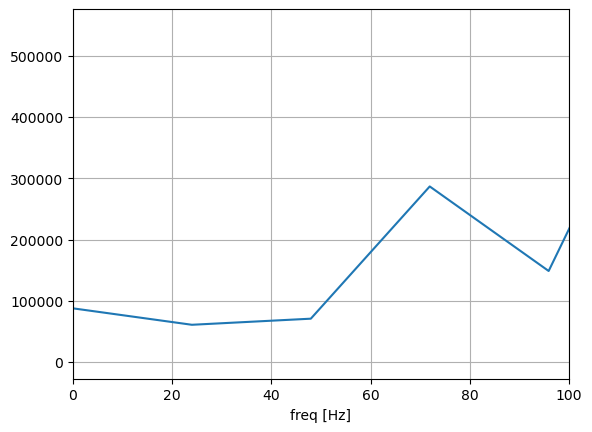

In [8]:
nperseg=nfft=n
freq, first_sig_psd = sig.welch(trials[0], nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2, fs=fs)
plt.plot(freq, first_sig_psd)
plt.xlim([0,100])
plt.xlabel('freq [Hz]')
plt.grid('on')

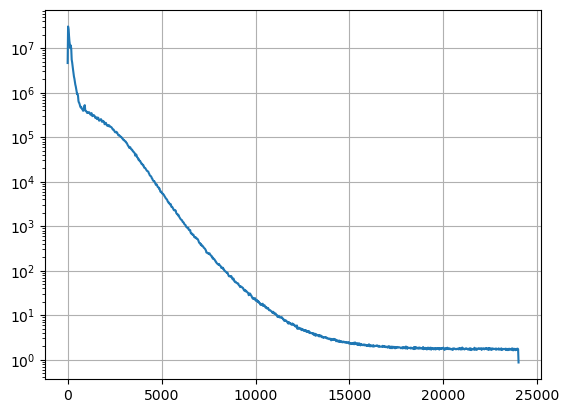

In [8]:
avg_psd = sum([sig.welch(trial, nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2, fs=fs)[1] 
               for trial in trials])
plt.semilogy(freq, avg_psd)
plt.grid('on')
